# Neighborhood of the quasi-periodic arrangement around an arbitrary point

In this notebook we will generate a Quasiperiodic lattice around an arbitrary point in the 2D space.

This is possible thanks to the capacity to approximate the crooked stripes (generated by fixing a star vector and his integer number and varying the other star vectors and his integer numbers) by true stripes.

Doing that, we could get the average separation between stripes and get an aproximation of the possibles integer numbers (and the star vectors) that generates the polygon that contain an arbitrary point in 2D space just by projecting this point into each of the star vectors and normalizing that projections by the average separation between stripes.

First, let's load the Julia files with the functions that we will use in this notebook

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")

generador_Vecindades_Vertices (generic function with 1 method)

We will use the "Plots" package to visualize our polygons, so let's load that

In [2]:
using Plots

### Obtain the vertices polygons of the quasiperiodic lattice in the neighborhood around an arbitrary point

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants.

Now we will define the array with the average separation between stripes orthogonal to each Star Vector. The theory behind why this average distance is equal to the half of the symmetry of the regular polygon generated by the Star Vectors will be explained in a future paper, not here.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

Now, we will get an arbitrary point inside a square centered at the origin with a side size of $L = 2e10$

In [4]:
Point = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

SL = 1e10; #Size of a half side of the square

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    Point = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    Point = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    Point = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    Point = [-rand()*SL, -rand()*SL];
end

2-element Array{Float64,1}:
 -9.459072290569223e9
  9.89532341370674e9 

Now, get the possible set of integer numbers associated with the different combinations of Star Vectors that could generate the polygon that contain our point. This is made by projecting our arbitrary point in each of the Star Vectors and normalizing that projection by the average distance between the stripes orthogonal to them.

In [5]:
Projections = proyecciones_Pto_Direccion_Franjas(Point, Average_Distance_Stripes, Star_Vectors);

With the previous set of integers numbers, we can create using the GDM, the set of vertices of the polygons around our point.

Because our algorithm to get the integers numbers is aproximated, we must give to that possible numbers a margin of error. 

For example, if the integer number is $Z = 3$, we must considered that (especially for small symmetrys) the real number could be $Z = 4$ or $Z = 2$ (In high symmetrys, around 8 and higher, this problem doesn't exist).

We can give that margin of error bigger if we want to get an bigger neighborhood of the quasiperiodic lattice around our point.

In [6]:
N = 1; #The margin of error to consider

#Let's get the vertices of the polygons in our neighborhood and the information of how them were generated
Dual_Points = generador_Vecindades_Vertices(Projections, Star_Vectors, Alphas_Array, N);

#Let's split the vertices coordinates in X coordinates and Y coordinates
X, Y = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

Finally, let's visualize our neighborhood of the quasiperiodic lattice and the Point in red.

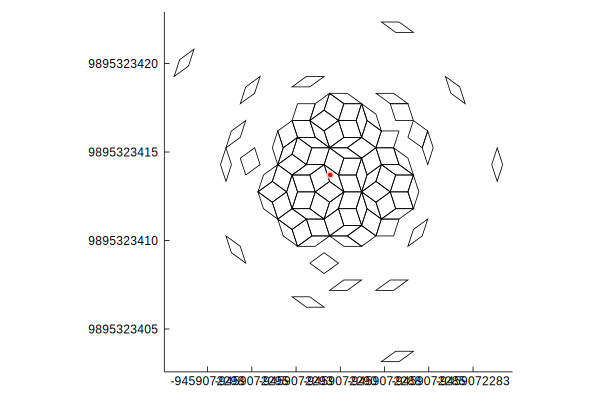

In [7]:
#Let's visualize the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([Point[1]], [Point[2]], legend = false, color = "red")

#### Example in a higher symmetry

In [8]:
NSides = 80; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

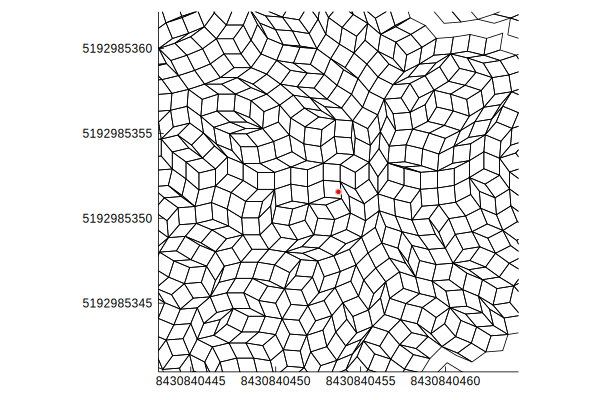

In [9]:
Point = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

SL = 1e10; #Size of a half side of the square

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    Point = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    Point = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    Point = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    Point = [-rand()*SL, -rand()*SL];
end

Projections = proyecciones_Pto_Direccion_Franjas(Point, Average_Distance_Stripes, Star_Vectors);

#NOTE THAT FOR HIGHER SYMMETRY WE DON'T NEED TO USE A MARGIN OF ERROR
N = 0; #The margin of error to consider

#Let's get the vertices of the polygons in our neighborhood and the information of how them were generated
Dual_Points = generador_Vecindades_Vertices(Projections, Star_Vectors, Alphas_Array, N);

#Let's split the vertices coordinates in X coordinates and Y coordinates
X, Y = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

#Let's visualize the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([Point[1]], [Point[2]], legend = false, color = "red", xlimit = [Point[1]-10, Point[1]+10], ylimit = [Point[2]-10, Point[2]+10])